# 0 .환경 세팅

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import sys
from IPython.display import Image
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os
import warnings
import tensorflow as tf
import tensorflow_datasets as tfds
warnings.filterwarnings("ignore")

In [3]:
os.chdir('/content/drive/My Drive/프로젝트/데이콘-직업/data')

# 1. 데이터 불러오기

In [4]:
know_2019=pd.read_csv('./train/KNOW_2019.csv',na_values=' ')
know_2019.head()

,idx,sq1,sq2,sq3,sq4,sq5,sq6,sq7,sq8,sq9,sq10,sq11,sq12,sq13,sq14,sq15,sq16,kq1_1,kq1_2,kq2_1,kq2_2,kq3_1,kq3_2,kq4_1,kq4_2,kq5_1,kq5_2,kq6_1,kq6_2,kq7_1,kq7_2,kq8_1,kq8_2,kq9_1,kq9_2,kq10_1,kq10_2,kq11_1,kq11_2,kq12_1,...,bq14_5,bq15,bq16_1,bq16_2,bq16_3,bq16_4,bq16_5,bq17,bq18_1,bq18_2,bq18_3,bq18_4,bq18_5,bq18_6,bq18_7,bq18_8,bq18_9,bq18_10,bq19,bq20,bq20_1,bq21_1,bq21_2,bq21_3,bq22,bq23,bq24,bq25,bq26,bq27,bq27_1,bq28,bq28_1,bq28_2,bq29,bq30,bq31_1,bq31_2,bq31_3,knowcode
0,18569,4,4,4,3,4,4,4,4,4,4,4,5,4,4,4,4,3,3,2,2,1,0,2,2,2,2,3,4,4,5,1,0,4,5,4,5,4,5,4,...,5.0,4.0,4.0,4.0,4.0,3.0,4.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,사람은 줄고 일은 많으니까 업무가 많다,3.0,4,수송수요가 늘어날다,4.0,4.0,3,NaN,NaN,NaN,1,35.0,4,기계공학과,1.0,1.0,NaN,1.0,40.0,3500.0,3000.0,NaN,812301
1,18570,4,3,4,4,4,4,3,4,5,4,3,5,4,4,1,2,4,6,3,4,4,5,5,5,3,4,5,6,1,0,1,0,1,0,1,0,1,0,1,...,3.0,3.0,4.0,2.0,3.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,1.0,3,운송시장이 큰 변화 없을듯해서,2.0,3.0,3,"컨테이너 대여사업,랜탈사업",NaN,NaN,1,63.0,3,경영학,2.0,NaN,5.0,NaN,40.0,NaN,NaN,5000.0,15201
2,18571,2,3,2,2,2,2,2,2,3,3,3,2,2,2,2,2,2,2,1,0,3,4,2,3,2,2,1,0,1,0,3,3,1,0,1,0,1,0,1,...,4.0,1.0,3.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,1.0,3,NaN,4.0,4.0,4,숙박업,NaN,NaN,2,62.0,2,NaN,2.0,NaN,6.0,NaN,30.0,NaN,NaN,3000.0,901101
3,18572,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,7,5,6,5,6,5,6,4,5,4,5,4,5,5,6,3,3,3,3,2,...,4.0,3.0,4.0,3.0,3.0,3.0,3.0,4.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,2.0,4,편리하게 일처리을 하기위해서 문서대행 업무를 맡길거 같아서,2.0,3.0,3,NaN,NaN,NaN,2,33.0,4,행정학,1.0,1.0,NaN,1.0,40.0,3600.0,2400.0,NaN,29903
4,18573,1,4,4,1,1,2,4,3,4,4,4,5,4,3,1,1,2,2,2,2,2,2,2,2,4,5,1,0,1,0,1,0,1,0,1,0,1,0,1,...,3.0,3.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,2.0,2,일거리가 줄어들고 있다,3.0,2.0,2,용역회사(청소원),NaN,NaN,1,67.0,1,NaN,2.0,NaN,6.0,NaN,45.0,NaN,NaN,1500.0,561401


In [5]:
know_2019_test=pd.read_csv('./test/KNOW_2019_test.csv',na_values=' ')
know_2019_test

,idx,sq1,sq2,sq3,sq4,sq5,sq6,sq7,sq8,sq9,sq10,sq11,sq12,sq13,sq14,sq15,sq16,kq1_1,kq1_2,kq2_1,kq2_2,kq3_1,kq3_2,kq4_1,kq4_2,kq5_1,kq5_2,kq6_1,kq6_2,kq7_1,kq7_2,kq8_1,kq8_2,kq9_1,kq9_2,kq10_1,kq10_2,kq11_1,kq11_2,kq12_1,...,bq14_4,bq14_5,bq15,bq16_1,bq16_2,bq16_3,bq16_4,bq16_5,bq17,bq18_1,bq18_2,bq18_3,bq18_4,bq18_5,bq18_6,bq18_7,bq18_8,bq18_9,bq18_10,bq19,bq20,bq20_1,bq21_1,bq21_2,bq21_3,bq22,bq23,bq24,bq25,bq26,bq27,bq27_1,bq28,bq28_1,bq28_2,bq29,bq30,bq31_1,bq31_2,bq31_3
0,18569,5,5,5,4,4,5,4,5,5,4,5,4,4,4,3,4,2,1,2,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,...,4,3.0,3.0,3.0,3.0,2.0,3.0,3.0,4.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,1,4,생명과 관련된 일이므로,2,2.0,2,사무직,NaN,NaN,1,57.0,4,경영,1.0,1.0,NaN,1.0,45.0,6700.0,3800.0,NaN
1,18570,2,3,3,1,3,2,3,3,3,2,3,4,3,2,1,3,1,0,1,0,1,0,1,0,1,0,1,0,3,3,1,0,1,0,1,0,1,0,1,...,5,2.0,2.0,1.0,2.0,1.0,1.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,2,3,3D업종이라서,2,2.0,2,NaN,NaN,NaN,1,27.0,3,화학,1.0,1.0,NaN,1.0,44.0,2700.0,2500.0,NaN
2,18571,5,4,5,4,4,4,4,5,4,4,4,5,4,4,4,4,2,2,3,3,1,0,2,3,1,0,1,0,1,0,1,0,3,4,3,4,1,0,4,...,5,3.0,2.0,1.0,2.0,1.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,1,4,산업안전 법규등의 강화로 안전관리자의 역활이 요구될것이므로,2,1.0,2,NaN,NaN,NaN,1,40.0,4,건축공학,1.0,1.0,NaN,1.0,40.0,6000.0,3200.0,NaN
3,18572,3,3,3,2,3,3,3,3,2,2,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,0,1,0,1,0,1,0,1,0,1,...,1,1.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,2,5,차량증가,2,2.0,2,주부,NaN,NaN,2,44.0,2,인문,1.0,1.0,NaN,1.0,60.0,900.0,800.0,NaN
4,18573,5,4,5,3,3,3,3,4,5,4,5,4,5,3,5,4,2,4,4,4,1,0,1,0,2,3,1,0,5,5,1,0,5,6,5,6,3,5,1,...,1,2.0,2.0,4.0,2.0,2.0,2.0,2.0,4.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,"인공지능, 4차산업혁명 등 새로운 R&D분야 필요, 연구개발 요구 받음, 혁신적인 ...",2,4,"무인화, 자동화 등 새로운 장비 기술에 대한 연구개발 수요 증가",1,4.0,3,자동차생산기술담당,NaN,NaN,1,36.0,6,기계공학과,1.0,1.0,NaN,1.0,50.0,7000.0,5000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8549,27122,3,4,5,2,4,4,4,5,5,4,5,3,4,3,1,1,1,0,2,3,1,0,1,0,4,3,1,0,1,0,1,0,2,4,1,0,1,0,1,...,3,3.0,3.0,2.0,4.0,2.0,3.0,3.0,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,1,3,아직까지는 유지할것이라고 생각을 합니다,3,3.0,3,보안직종,NaN,NaN,1,34.0,2,화학공업과,1.0,3.0,NaN,2.0,48.0,2400.0,1800.0,NaN
8550,27123,4,4,3,4,3,4,4,3,3,4,4,5,4,3,4,4,4,5,4,5,4,5,3,4,3,4,1,0,3,4,2,3,2,2,1,0,4,4,1,...,4,4.0,2.0,3.0,2.0,3.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,1,4,여가 생활을 일반인들이 예술을 즐겨해서,4,4.0,4,NaN,NaN,NaN,1,46.0,4,조소학과,1.0,3.0,NaN,2.0,48.0,2800.0,1650.0,NaN
8551,27124,3,4,4,2,2,2,3,4,4,3,4,4,4,2,2,1,2,2,2,2,2,2,1,0,4,5,1,0,1,0,1,0,1,0,1,0,1,0,1,...,4,4.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,3,2,자동화,3,3.0,3,NaN,NaN,NaN,1,40.0,3,컴퓨터공학,1.0,1.0,NaN,1.0,40.0,3500.0,2300.0,NaN
8552,27125,4,4,3,3,4,3,4,3,4,3,3,4,3,4,3,2,3,4,3,3,4,4,4,4,4,4,1,0,3,3,3,3,3,3,2,2,3,2,2,...,3,4.0,1.0,4.0,4.0,3.0,4.0,4.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,1,4,4차혁명과 무관한 개인의 소질만이 창작을 할수있어서,4,4.0,3,NaN,공예과,NaN,1,36.0,4,조소학과,1.0,1.0,NaN,1.0,48.0,2800.0,1900.0,NaN


# 2. EDA

## 데이터 type 분포

In [6]:
print('학습용 데이터 type 분포')
know_2019[know_2019.columns[1:]].dtypes.value_counts()

학습용 데이터 type 분포


int64      93
float64    38
object     21
dtype: int64

In [7]:
print('평가용 데이터 type 분포')
know_2019_test[know_2019_test.columns[1:]].dtypes.value_counts() #label 컬럼이 하나 없다.

평가용 데이터 type 분포


int64      104
float64     33
object      14
dtype: int64

## Target Column - knowcode 파악

In [8]:
print("데이터 target column(상위 5개) 분포")
print(know_2019['knowcode'].value_counts()[:5])

데이터 target column(상위 5개) 분포
13305     45
415404    31
22103     30
417102    30
24404     30
Name: knowcode, dtype: int64


13305 : 경찰·소방·교도 관리자

415404 : 시각디자이너

22103 : 경영 진단 전문가

417102 : 웹방송전문가(1인미디어콘텐츠제작자)

24404 : 행사 기획자

In [9]:
job_top5=['13305','415404','22103','417102','24404']

Text(0, 0.5, 'Count')

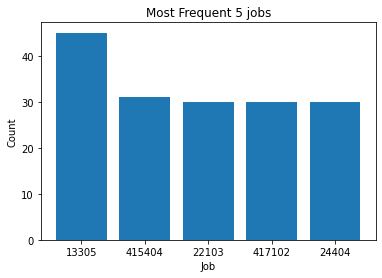

In [10]:
plt.bar(job_top5,know_2019['knowcode'].value_counts()[:5])
plt.title('Most Frequent 5 jobs')
plt.xlabel('Job')
plt.ylabel('Count')

In [11]:
print("데이터 target column(하위 5개) 분포")
print(know_2019['knowcode'].value_counts()[-5:])

데이터 target column(하위 5개) 분포
415202    14
133101    14
121103    13
13304      8
825201     4
Name: knowcode, dtype: int64


415202 : 패션소품 디자이너(의상 제외)

133101 : 시스템 소프트웨어 개발자(프로그래머)

121103 : 농학연구원

13304 : 법률관리자

825201 : 도금·금속분무기 조작원

In [12]:
job_low5=['415202','133101','121103','13304','825201']

Text(0, 0.5, 'Count')

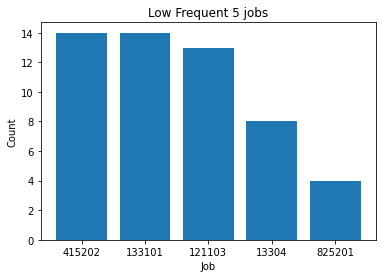

In [13]:
plt.bar(job_low5,know_2019['knowcode'].value_counts()[-5:])
plt.title('Low Frequent 5 jobs')
plt.xlabel('Job')
plt.ylabel('Count')

## sq 간 상관관계

In [14]:
columns=know_2019.columns[1:-1][:16]
columns

Index(['sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'sq8', 'sq9', 'sq10',
       'sq11', 'sq12', 'sq13', 'sq14', 'sq15', 'sq16'],
      dtype='object')

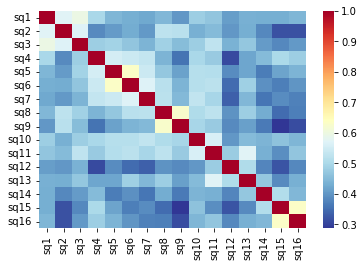

In [15]:
sns.heatmap(know_2019[columns].corr(),cmap = plt.cm.RdYlBu_r, annot=False)

## kq간 상관관계

In [16]:
columns=know_2019.columns[1:-1][16:82]
columns

Index(['kq1_1', 'kq1_2', 'kq2_1', 'kq2_2', 'kq3_1', 'kq3_2', 'kq4_1', 'kq4_2',
       'kq5_1', 'kq5_2', 'kq6_1', 'kq6_2', 'kq7_1', 'kq7_2', 'kq8_1', 'kq8_2',
       'kq9_1', 'kq9_2', 'kq10_1', 'kq10_2', 'kq11_1', 'kq11_2', 'kq12_1',
       'kq12_2', 'kq13_1', 'kq13_2', 'kq14_1', 'kq14_2', 'kq15_1', 'kq15_2',
       'kq16_1', 'kq16_2', 'kq17_1', 'kq17_2', 'kq18_1', 'kq18_2', 'kq19_1',
       'kq19_2', 'kq20_1', 'kq20_2', 'kq21_1', 'kq21_2', 'kq22_1', 'kq22_2',
       'kq23_1', 'kq23_2', 'kq24_1', 'kq24_2', 'kq25_1', 'kq25_2', 'kq26_1',
       'kq26_2', 'kq27_1', 'kq27_2', 'kq28_1', 'kq28_2', 'kq29_1', 'kq29_2',
       'kq30_1', 'kq30_2', 'kq31_1', 'kq31_2', 'kq32_1', 'kq32_2', 'kq33_1',
       'kq33_2'],
      dtype='object')

In [17]:
len(columns)

66

In [18]:
columns=columns[range(0,66,2)]
columns

Index(['kq1_1', 'kq2_1', 'kq3_1', 'kq4_1', 'kq5_1', 'kq6_1', 'kq7_1', 'kq8_1',
       'kq9_1', 'kq10_1', 'kq11_1', 'kq12_1', 'kq13_1', 'kq14_1', 'kq15_1',
       'kq16_1', 'kq17_1', 'kq18_1', 'kq19_1', 'kq20_1', 'kq21_1', 'kq22_1',
       'kq23_1', 'kq24_1', 'kq25_1', 'kq26_1', 'kq27_1', 'kq28_1', 'kq29_1',
       'kq30_1', 'kq31_1', 'kq32_1', 'kq33_1'],
      dtype='object')

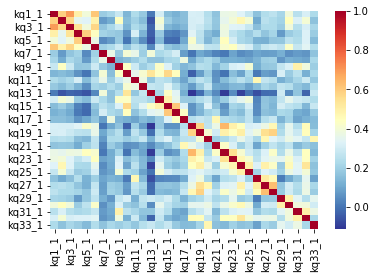

In [19]:
sns.heatmap(know_2019[columns].corr(),cmap = plt.cm.RdYlBu_r, annot=False)

## 산업 유형 (bq1)

In [20]:
know_2019['bq1'].value_counts()

3     1432
15     839
13     779
17     737
18     676
19     638
10     581
6      565
16     484
8      357
7      345
11     338
9      225
20     143
1      137
4       93
14      90
5       49
12      25
2       22
Name: bq1, dtype: int64

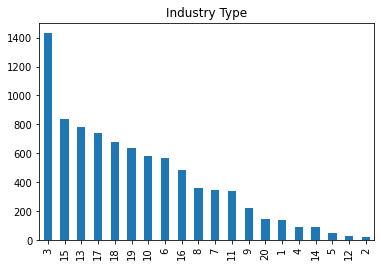

In [21]:
know_2019['bq1'].value_counts().plot.bar(title='Industry Type')

산업 유형이 3인 사람들의 직업 코드의 분포를 보겠다.

In [22]:
know_2019[know_2019['bq1']==3]['knowcode'].value_counts()[:10]

816103    30
862201    15
835101    15
861101    15
873401    15
826301    15
861201    15
873501    15
826401    15
863301    15
Name: knowcode, dtype: int64

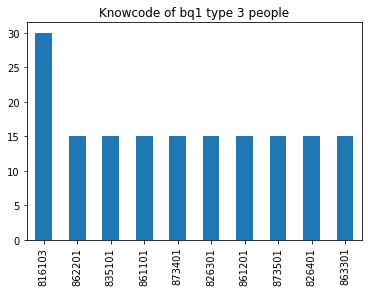

In [23]:
know_2019[know_2019['bq1']==3]['knowcode'].value_counts()[:10].plot.bar(title='Knowcode of bq1 type 3 people')

산업 유형이 15인 사람들의 직업 코드의 분포를 보겠다.

In [24]:
know_2019[know_2019['bq1']==15]['knowcode'].value_counts()[:10]

13305     45
621102    16
240201    15
621401    15
250201    15
25402     15
25401     15
21001     15
240102    15
240101    15
Name: knowcode, dtype: int64

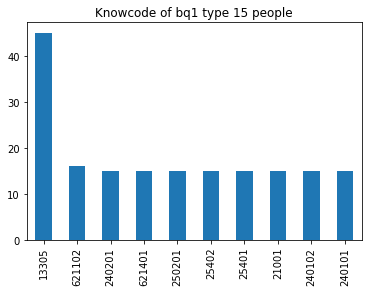

In [25]:
know_2019[know_2019['bq1']==15]['knowcode'].value_counts()[:10].plot.bar(title='Knowcode of bq1 type 15 people')

산업 유형이 13인 사람들의 직업 코드의 분포를 보겠다.

In [26]:
know_2019[know_2019['bq1']==13]['knowcode'].value_counts()[:10]

24203     30
417102    17
222001    16
221401    15
122103    15
13902     15
140503    15
221301    15
158501    15
221201    15
Name: knowcode, dtype: int64

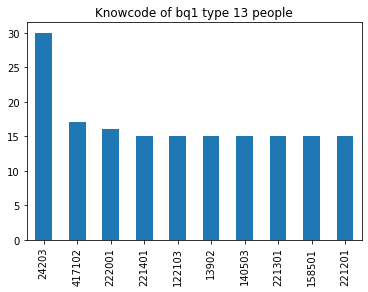

In [27]:
know_2019[know_2019['bq1']==13]['knowcode'].value_counts()[:10].plot.bar(title='Knowcode of bq1 type 13 people')

bq1의 유형과 직업코드를 비교하여 보았을 때 꽤 큰 관련이 있고 knowcode 예측에 중요한 변수로 작용할 것이라고 추측할 수 있다.

type 3인 경우엔 88으로 시작하는 직업 코드가 많았고

type 15인 경우엔 62&24,

type 13인 경우엔 22로 시작하는 직업 코드가 많았다.

## 근무업체 유형(bq2)

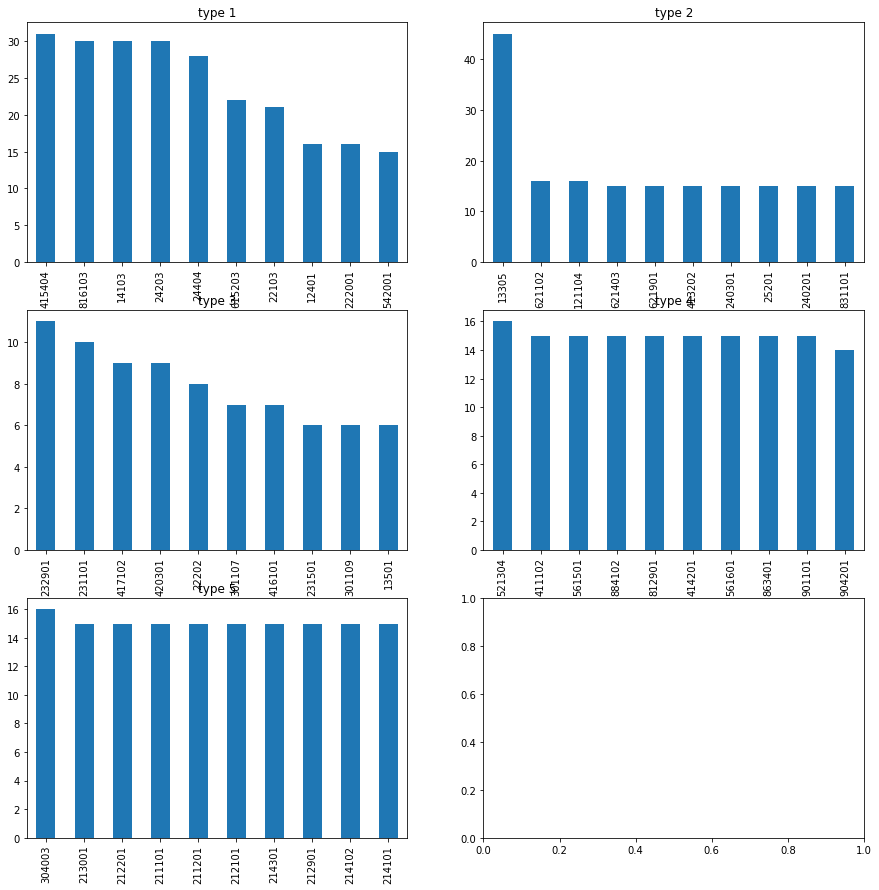

In [28]:
f, ax = plt.subplots(3,2, figsize=(15,15))

for i,j in enumerate(range(1,6)):
  row=int(i/2)
  col=i%2
  know_2019[know_2019['bq2']==j]['knowcode'].value_counts()[:10].plot.bar(title='type '+str(j),ax=ax[row][col])

근무업체 유형에 따라서도 knowcode의 경향은 많이 달라지는 걸 확인할 수 있다.

## 근무업체 규모(bq3)

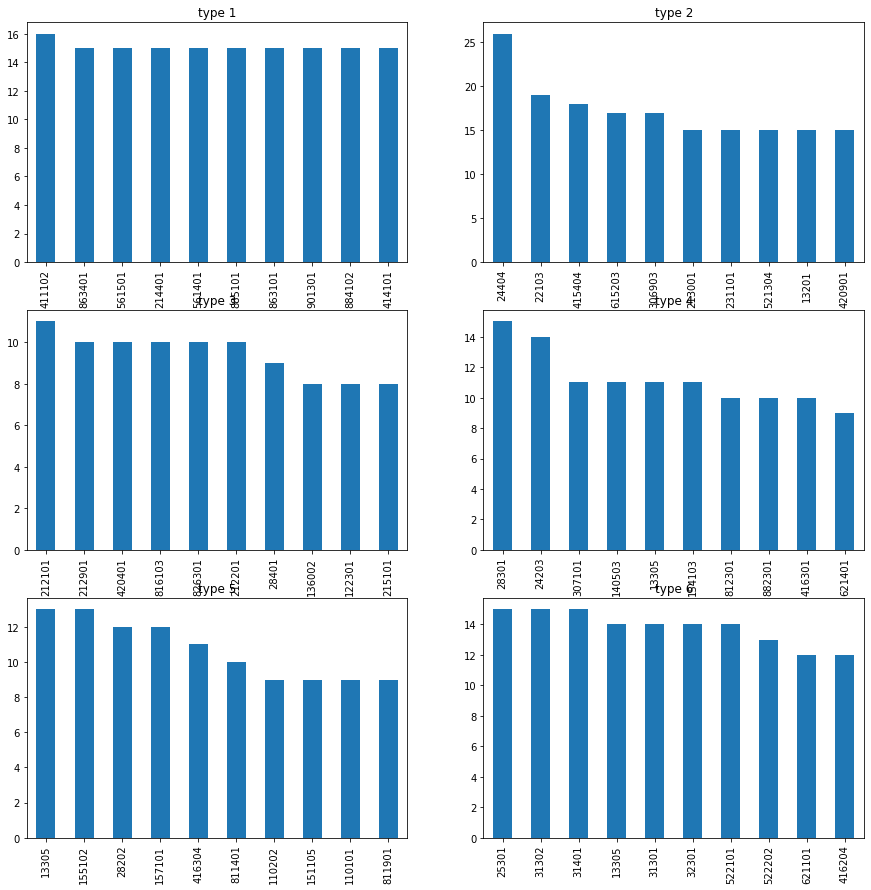

In [29]:
f, ax = plt.subplots(3,2, figsize=(15,15))

for i,j in enumerate(range(1,7)):
  row=int(i/2)
  col=i%2
  know_2019[know_2019['bq3']==j]['knowcode'].value_counts()[:10].plot.bar(title='type '+str(j),ax=ax[row][col])

근무업체 규모에 따라서는 공통적으로 많이 존재하는 knowcode가 주로 등장하고 선택한 선지에 따라서는 크게 차이가 없어 보인다.

## 요구훈련 기간(bq5_1)

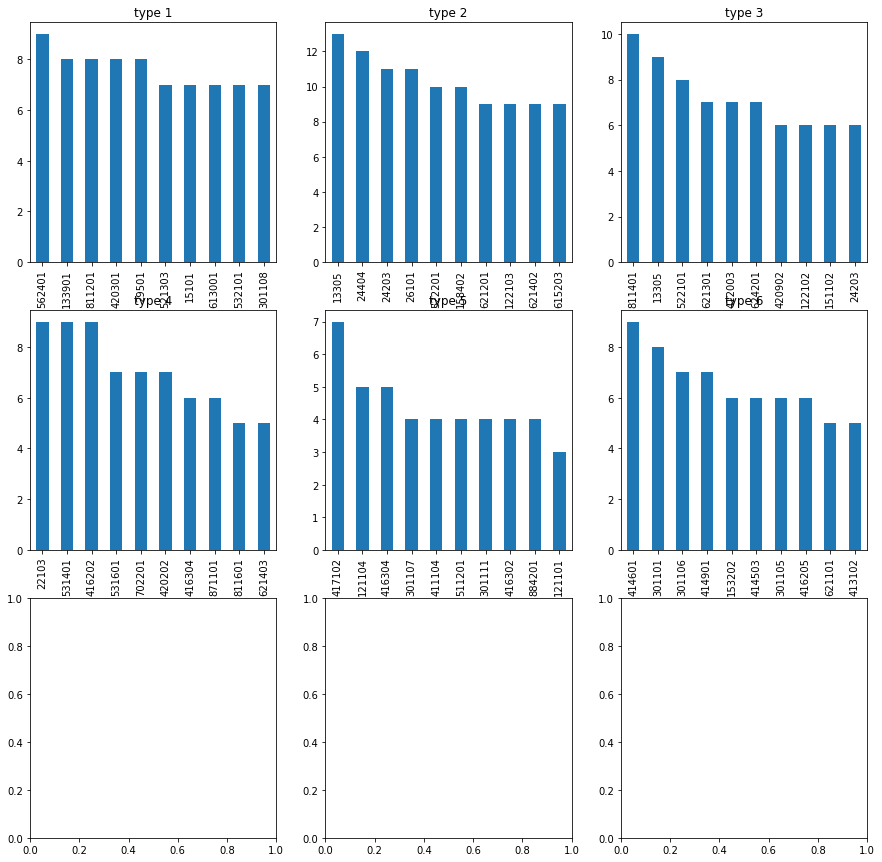

In [30]:
f, ax = plt.subplots(3,3, figsize=(15,15))

for i,j in enumerate(range(1,7)):
  row=int(i/3)
  col=i%3
  know_2019[know_2019['bq5_1']==j]['knowcode'].value_counts()[:10].plot.bar(title='type '+str(j),ax=ax[row][col])

요구 훈련기간 따라서는 유의미한 분류를 할 수 있을 것으로 보인다.

## 교육수준 (bq 7)

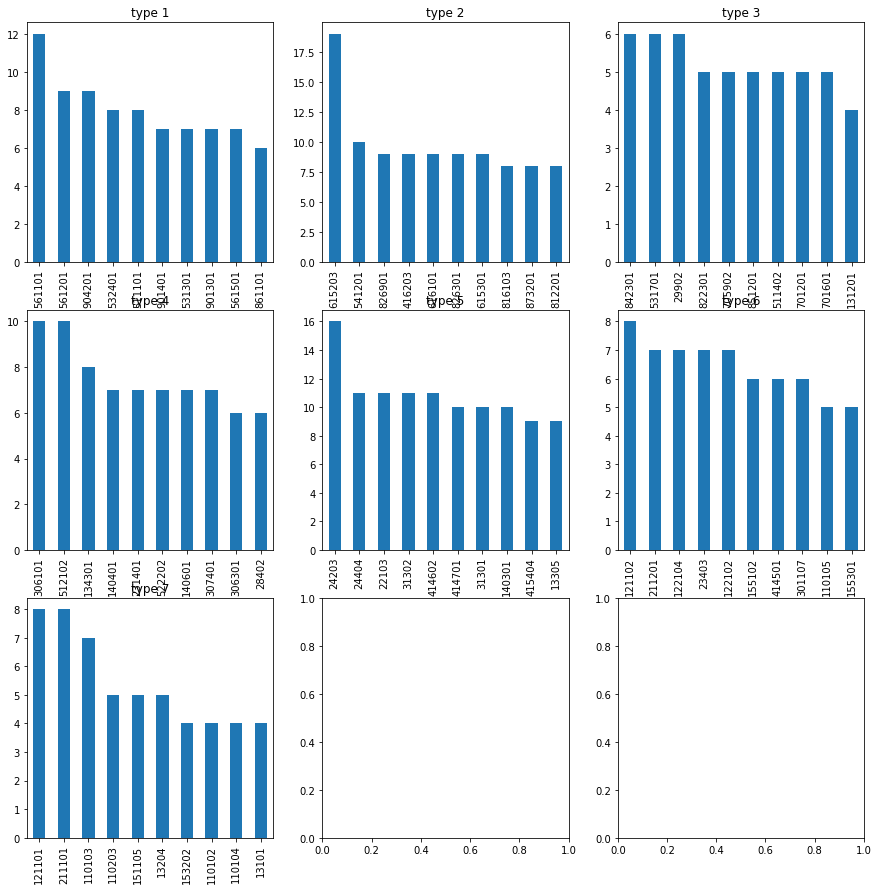

In [31]:
f, ax = plt.subplots(3,3, figsize=(15,15))

for i,j in enumerate(range(1,8)):
  row=int(i/3)
  col=i%3
  know_2019[know_2019['bq7']==j]['knowcode'].value_counts()[:10].plot.bar(title='type '+str(j),ax=ax[row][col])

## 직업 안정성(bq 9) 

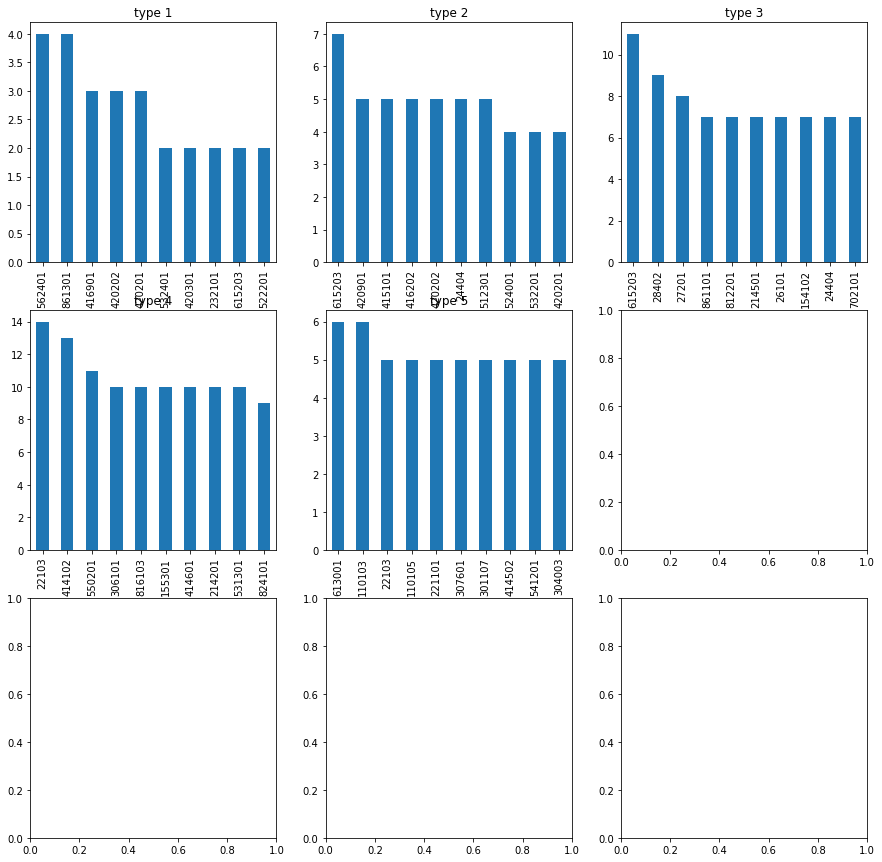

In [32]:
f, ax = plt.subplots(3,3, figsize=(15,15))

for i,j in enumerate(range(1,6)):
  row=int(i/3)
  col=i%3
  know_2019[know_2019['bq9']==j]['knowcode'].value_counts()[:10].plot.bar(title='type '+str(j),ax=ax[row][col])

## 근무조건 (bq 11)

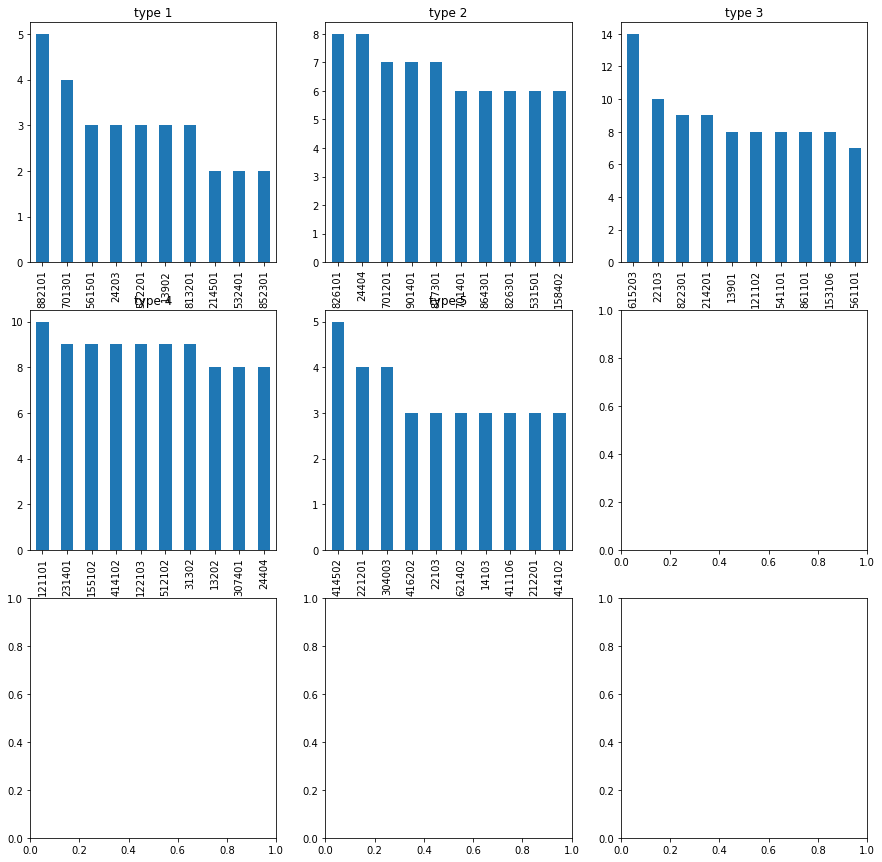

In [33]:
f, ax = plt.subplots(3,3, figsize=(15,15))

for i,j in enumerate(range(1,6)):
  row=int(i/3)
  col=i%3
  know_2019[know_2019['bq11']==j]['knowcode'].value_counts()[:10].plot.bar(title='type '+str(j),ax=ax[row][col])

## 향후 일자리 변화(bq 20)

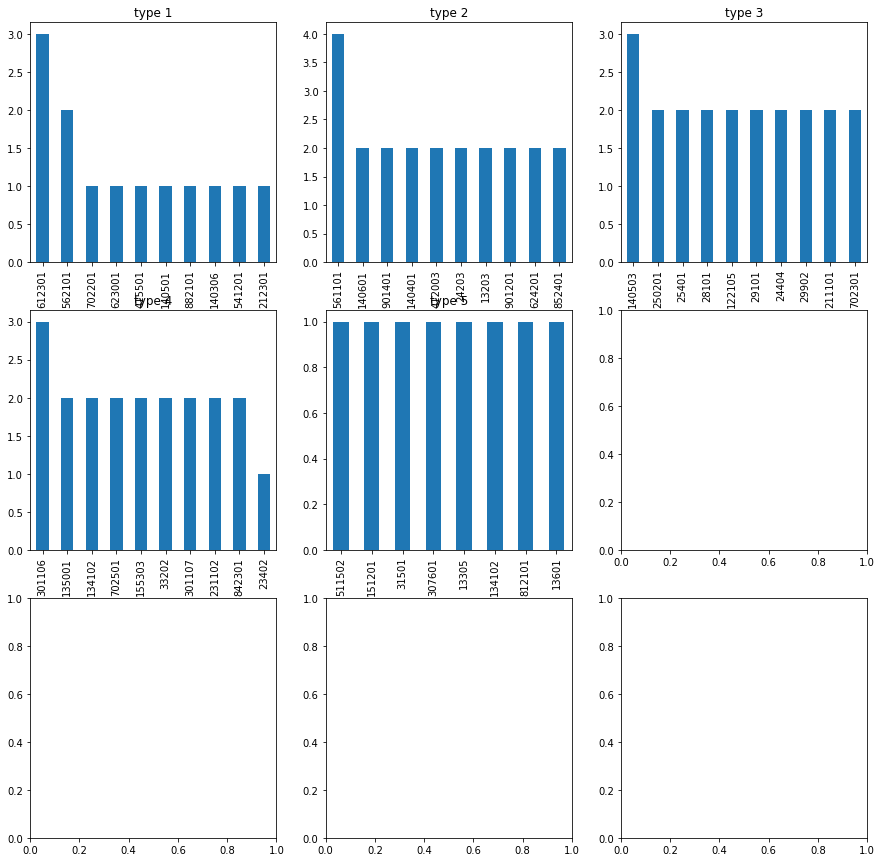

In [34]:
f, ax = plt.subplots(3,3, figsize=(15,15))

for i,j in enumerate(range(1,6)):
  row=int(i/3)
  col=i%3
  know_2019[know_2019['bq20']==j]['knowcode'].value_counts()[:10].plot.bar(title='type '+str(j),ax=ax[row][col])

## 최종학력(bq 27)

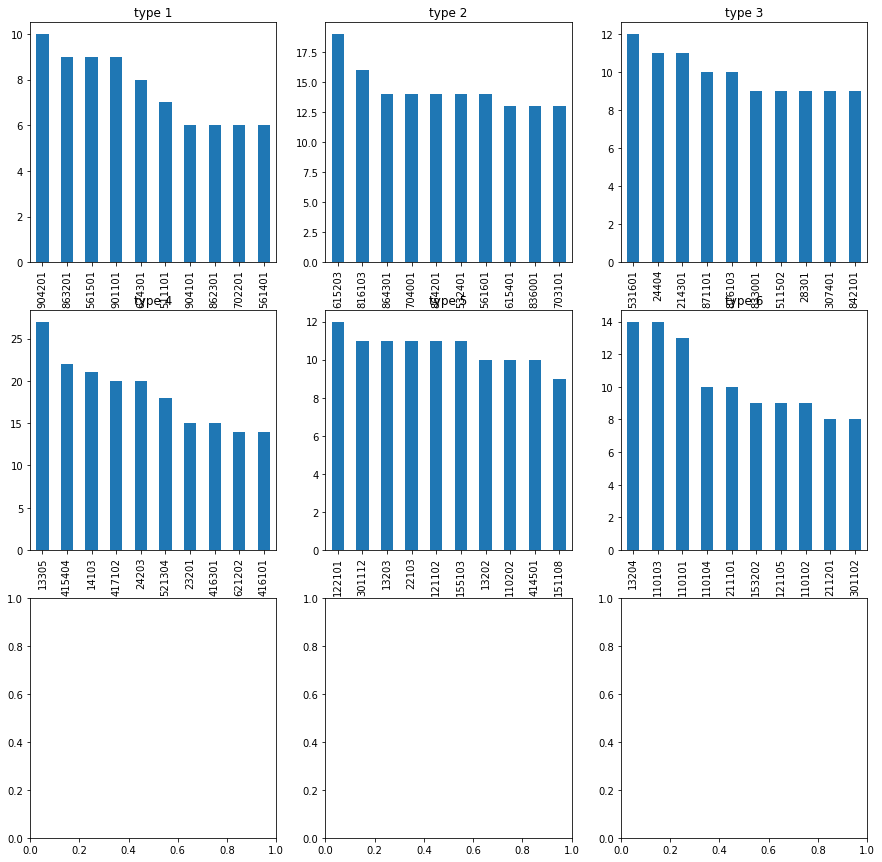

In [35]:
f, ax = plt.subplots(3,3, figsize=(15,15))

for i,j in enumerate(range(1,7)):
  row=int(i/3)
  col=i%3
  know_2019[know_2019['bq27']==str(j)]['knowcode'].value_counts()[:10].plot.bar(title='type '+str(j),ax=ax[row][col])

## 계약형태 (bq 29)

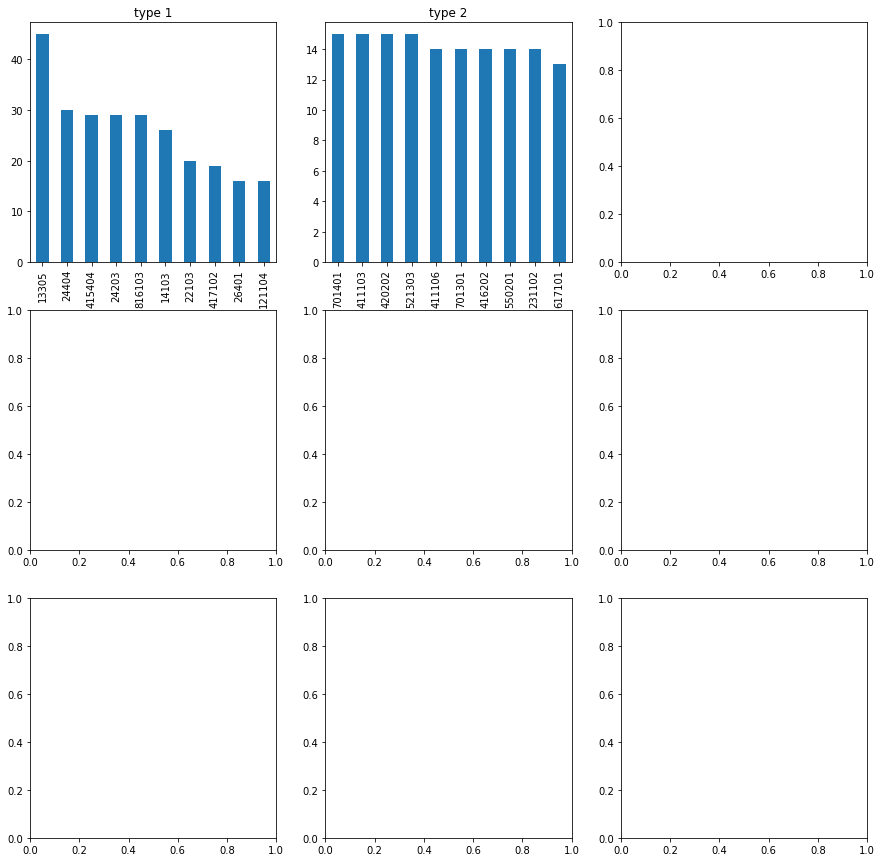

In [36]:
f, ax = plt.subplots(3,3, figsize=(15,15))

for i,j in enumerate(range(1,3)):
  row=int(i/3)
  col=i%3
  know_2019[know_2019['bq29']==j]['knowcode'].value_counts()[:10].plot.bar(title='type '+str(j),ax=ax[row][col])

# 3. 데이터 파악하기

## 3.1 결측치 파악

In [37]:
for index, value, tindex, tvalue in zip(know_2019.isnull().sum().index, know_2019.isnull().sum(), know_2019_test.isnull().sum().index, know_2019_test.isnull().sum()):
    print(f"{index} : {value} / {tindex} : {tvalue} / {value + tvalue}")

idx : 0 / idx : 0 / 0
sq1 : 0 / sq1 : 0 / 0
sq2 : 0 / sq2 : 0 / 0
sq3 : 0 / sq3 : 0 / 0
sq4 : 0 / sq4 : 0 / 0
sq5 : 0 / sq5 : 0 / 0
sq6 : 0 / sq6 : 0 / 0
sq7 : 0 / sq7 : 0 / 0
sq8 : 0 / sq8 : 0 / 0
sq9 : 0 / sq9 : 0 / 0
sq10 : 0 / sq10 : 0 / 0
sq11 : 0 / sq11 : 0 / 0
sq12 : 0 / sq12 : 0 / 0
sq13 : 0 / sq13 : 0 / 0
sq14 : 0 / sq14 : 0 / 0
sq15 : 0 / sq15 : 0 / 0
sq16 : 0 / sq16 : 0 / 0
kq1_1 : 0 / kq1_1 : 0 / 0
kq1_2 : 0 / kq1_2 : 0 / 0
kq2_1 : 0 / kq2_1 : 0 / 0
kq2_2 : 0 / kq2_2 : 0 / 0
kq3_1 : 0 / kq3_1 : 0 / 0
kq3_2 : 0 / kq3_2 : 0 / 0
kq4_1 : 0 / kq4_1 : 0 / 0
kq4_2 : 0 / kq4_2 : 0 / 0
kq5_1 : 0 / kq5_1 : 0 / 0
kq5_2 : 0 / kq5_2 : 0 / 0
kq6_1 : 0 / kq6_1 : 0 / 0
kq6_2 : 0 / kq6_2 : 0 / 0
kq7_1 : 0 / kq7_1 : 0 / 0
kq7_2 : 0 / kq7_2 : 0 / 0
kq8_1 : 0 / kq8_1 : 0 / 0
kq8_2 : 0 / kq8_2 : 0 / 0
kq9_1 : 0 / kq9_1 : 0 / 0
kq9_2 : 0 / kq9_2 : 0 / 0
kq10_1 : 0 / kq10_1 : 0 / 0
kq10_2 : 0 / kq10_2 : 0 / 0
kq11_1 : 0 / kq11_1 : 0 / 0
kq11_2 : 0 / kq11_2 : 0 / 0
kq12_1 : 0 / kq12_1 : 0 / 0
kq12

## 3.2 결측치 처리

### bq4_1

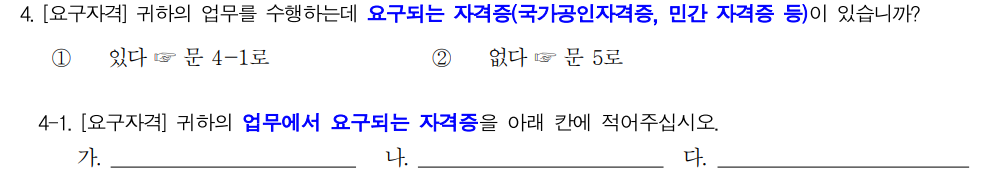

In [38]:
Image('./image/2017bq4_1.PNG')

4에서 없다고 선택한 사람들은 모두 '없음'으로 처리하겠다.

In [39]:
know_2019.loc[(know_2019['bq4'] == 2) & (know_2019['bq4_1a'].isnull()), 'bq4_1a'] = '없다'
know_2019_test.loc[(know_2019_test['bq4'] == 2) & (know_2019_test['bq4_1a'].isnull()), 'bq4_1a'] = '없다'
know_2019.loc[(know_2019['bq4'] == 2) & (know_2019['bq4_1b'].isnull()), 'bq4_1b'] = '없다'
know_2019_test.loc[(know_2019_test['bq4'] == 2) & (know_2019_test['bq4_1b'].isnull()), 'bq4_1b'] = '없다'
know_2019.loc[(know_2019['bq4'] == 2) & (know_2019['bq4_1c'].isnull()), 'bq4_1c'] = '없다'
know_2019_test.loc[(know_2019_test['bq4'] == 2) & (know_2019_test['bq4_1c'].isnull()), 'bq4_1c'] = '없다'

1을 선택하고 자격증을 입력하지 않은 사람들은 가장 흔한 '정보처리기사'를 입력하겠다.

In [40]:
print(len(know_2019.loc[(know_2019['bq4'] == 1) & (know_2019['bq4_1a'].isnull()), 'bq4_1a']),
len(know_2019_test.loc[(know_2019_test['bq4'] == 1) & (know_2019_test['bq4_1a'].isnull()), 'bq4_1a']))

9 14


In [41]:
know_2019.bq4_1a.value_counts()

없다            4434
정보처리기사          87
전기기사            81
의사면허증           65
토목기사            63
              ... 
운전면허 1종 대형       1
소방관련자격증          1
로우더운전기능사         1
교감               1
농구심판증            1
Name: bq4_1a, Length: 1559, dtype: int64

In [42]:
know_2019.loc[(know_2019['bq4'] == 1) & (know_2019['bq4_1a'].isnull()), 'bq4_1a']='정보처리기사'
know_2019_test.loc[(know_2019_test['bq4'] == 1) & (know_2019_test['bq4_1a'].isnull()), 'bq4_1a']='정보처리기사'

1을 선택하였지만 두 번째, 세 번째를 비워둔 사람들은 자격증이 하나만 있다고 판단하여 없다고 입력하겠다.

In [43]:
know_2019.loc[(know_2019['bq4'] == 1) & (know_2019['bq4_1b'].isnull()), 'bq4_1b'] = '없다'
know_2019_test.loc[(know_2019_test['bq4'] == 1) & (know_2019_test['bq4_1b'].isnull()), 'bq4_1b'] = '없다'
know_2019.loc[(know_2019['bq4'] == 1) & (know_2019['bq4_1c'].isnull()), 'bq4_1c'] = '없다'
know_2019_test.loc[(know_2019_test['bq4'] == 1) & (know_2019_test['bq4_1c'].isnull()), 'bq4_1c'] = '없다'

In [44]:
print(sum(know_2019['bq4_1a'].isnull()))
print(sum(know_2019['bq4_1b'].isnull()))
print(sum(know_2019['bq4_1c'].isnull()))
print(sum(know_2019_test['bq4_1a'].isnull()))
print(sum(know_2019_test['bq4_1b'].isnull()))
print(sum(know_2019_test['bq4_1c'].isnull()))

0
0
0
0
0
0


In [45]:
train_nan_columns = []
test_nan_columns = []
for index, value, tindex, tvalue in zip(know_2019.isnull().sum().index, know_2019.isnull().sum(), know_2019_test.isnull().sum().index, know_2019_test.isnull().sum()):
    if value != 0 :
        train_nan_columns.append(index)
    if tvalue != 0:
        test_nan_columns.append(tindex)

print(train_nan_columns)
print(test_nan_columns)

['bq5_1', 'bq5_2', 'bq9', 'bq11', 'bq12_5', 'bq13_1', 'bq13_2', 'bq13_3', 'bq14_1', 'bq14_2', 'bq14_3', 'bq14_4', 'bq14_5', 'bq15', 'bq16_1', 'bq16_2', 'bq16_3', 'bq16_4', 'bq16_5', 'bq17', 'bq18_1', 'bq18_2', 'bq18_3', 'bq18_4', 'bq18_5', 'bq18_6', 'bq18_7', 'bq18_8', 'bq18_9', 'bq18_10', 'bq19', 'bq20', 'bq20_1', 'bq21_1', 'bq21_2', 'bq21_3', 'bq22', 'bq23', 'bq24', 'bq25', 'bq26', 'bq27', 'bq27_1', 'bq28', 'bq28_1', 'bq28_2', 'bq29', 'bq30', 'bq31_1', 'bq31_2', 'bq31_3']
['bq5_1', 'bq5_2', 'bq18_10', 'bq20_1', 'bq21_3', 'bq22', 'bq23', 'bq24', 'bq26', 'bq27_1', 'bq28', 'bq28_1', 'bq28_2', 'bq29', 'bq30', 'bq31_1', 'bq31_2', 'bq31_3']


### bq5

필요없다고 생각한 사람들이 결측치로 남겨놨을 확률이 높으므로 5-1의 경우에는 0으로, 5-2는 없음으로 한다.

In [46]:
know_2019.loc[(know_2019['bq5_1'].isnull()), 'bq5_1'] = 0
know_2019_test.loc[(know_2019_test['bq5_1'].isnull()), 'bq5_1'] = 0
know_2019.loc[(know_2019['bq5_2'].isnull()), 'bq5_2'] = '없다'
know_2019_test.loc[(know_2019_test['bq5_2'].isnull()), 'bq5_2'] = '없다'

print(sum(know_2019['bq5_1'].isnull()))
print(sum(know_2019['bq5_2'].isnull()))
print(sum(know_2019_test['bq5_1'].isnull()))
print(sum(know_2019_test['bq5_2'].isnull()))

0
0
0
0


### bq9

In [47]:
know_2019.loc[know_2019['bq9'].isnull(),]

,idx,sq1,sq2,sq3,sq4,sq5,sq6,sq7,sq8,sq9,sq10,sq11,sq12,sq13,sq14,sq15,sq16,kq1_1,kq1_2,kq2_1,kq2_2,kq3_1,kq3_2,kq4_1,kq4_2,kq5_1,kq5_2,kq6_1,kq6_2,kq7_1,kq7_2,kq8_1,kq8_2,kq9_1,kq9_2,kq10_1,kq10_2,kq11_1,kq11_2,kq12_1,...,bq14_5,bq15,bq16_1,bq16_2,bq16_3,bq16_4,bq16_5,bq17,bq18_1,bq18_2,bq18_3,bq18_4,bq18_5,bq18_6,bq18_7,bq18_8,bq18_9,bq18_10,bq19,bq20,bq20_1,bq21_1,bq21_2,bq21_3,bq22,bq23,bq24,bq25,bq26,bq27,bq27_1,bq28,bq28_1,bq28_2,bq29,bq30,bq31_1,bq31_2,bq31_3,knowcode
1394,19963,3,4,4,4,5,4,5,5,5,4,5,5,3,4,3,4,3,4,3,4,3,4,4,6,3,5,3,5,2,3,1,0,2,4,1,0,1,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13902


위 사람이 대부분 결측치를 만들어내므로 drop하겠다.

In [48]:
know_2019=know_2019.drop(1394,axis=0)

In [49]:
train_nan_columns = []
test_nan_columns = []
for index, value, tindex, tvalue in zip(know_2019.isnull().sum().index, know_2019.isnull().sum(), know_2019_test.isnull().sum().index, know_2019_test.isnull().sum()):
    if value != 0 :
        train_nan_columns.append(index)
    if tvalue != 0:
        test_nan_columns.append(tindex)

print(train_nan_columns)
print(test_nan_columns)

['bq11', 'bq12_5', 'bq13_1', 'bq13_2', 'bq13_3', 'bq14_1', 'bq14_2', 'bq14_3', 'bq14_4', 'bq14_5', 'bq15', 'bq16_1', 'bq16_2', 'bq16_3', 'bq16_4', 'bq16_5', 'bq17', 'bq18_1', 'bq18_2', 'bq18_3', 'bq18_4', 'bq18_5', 'bq18_6', 'bq18_7', 'bq18_8', 'bq18_9', 'bq18_10', 'bq19', 'bq20', 'bq20_1', 'bq21_1', 'bq21_2', 'bq21_3', 'bq22', 'bq23', 'bq24', 'bq25', 'bq26', 'bq27', 'bq27_1', 'bq28', 'bq28_1', 'bq28_2', 'bq29', 'bq30', 'bq31_1', 'bq31_2', 'bq31_3']
['bq18_10', 'bq20_1', 'bq21_3', 'bq22', 'bq23', 'bq24', 'bq26', 'bq27_1', 'bq28', 'bq28_1', 'bq28_2', 'bq29', 'bq30', 'bq31_1', 'bq31_2', 'bq31_3']


### bq11

In [50]:
know_2019.loc[know_2019['bq11'].isnull(),] #이 사람도 위 사람과 동일하다.

,idx,sq1,sq2,sq3,sq4,sq5,sq6,sq7,sq8,sq9,sq10,sq11,sq12,sq13,sq14,sq15,sq16,kq1_1,kq1_2,kq2_1,kq2_2,kq3_1,kq3_2,kq4_1,kq4_2,kq5_1,kq5_2,kq6_1,kq6_2,kq7_1,kq7_2,kq8_1,kq8_2,kq9_1,kq9_2,kq10_1,kq10_2,kq11_1,kq11_2,kq12_1,...,bq14_5,bq15,bq16_1,bq16_2,bq16_3,bq16_4,bq16_5,bq17,bq18_1,bq18_2,bq18_3,bq18_4,bq18_5,bq18_6,bq18_7,bq18_8,bq18_9,bq18_10,bq19,bq20,bq20_1,bq21_1,bq21_2,bq21_3,bq22,bq23,bq24,bq25,bq26,bq27,bq27_1,bq28,bq28_1,bq28_2,bq29,bq30,bq31_1,bq31_2,bq31_3,knowcode
2610,21180,5,5,5,2,5,2,5,3,3,2,5,5,5,5,2,3,2,4,4,6,1,0,2,2,2,3,2,2,1,0,1,0,2,5,2,3,3,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,413202


In [51]:
know_2019=know_2019.drop(2610,axis=0)

In [52]:
train_nan_columns = []
test_nan_columns = []
for index, value, tindex, tvalue in zip(know_2019.isnull().sum().index, know_2019.isnull().sum(), know_2019_test.isnull().sum().index, know_2019_test.isnull().sum()):
    if value != 0 :
        train_nan_columns.append(index)
    if tvalue != 0:
        test_nan_columns.append(tindex)

print(train_nan_columns)
print(test_nan_columns)

['bq13_2', 'bq14_4', 'bq14_5', 'bq15', 'bq16_1', 'bq16_2', 'bq16_3', 'bq16_4', 'bq16_5', 'bq17', 'bq18_1', 'bq18_2', 'bq18_3', 'bq18_4', 'bq18_5', 'bq18_6', 'bq18_7', 'bq18_8', 'bq18_9', 'bq18_10', 'bq19', 'bq20', 'bq20_1', 'bq21_1', 'bq21_2', 'bq21_3', 'bq22', 'bq23', 'bq24', 'bq25', 'bq26', 'bq27', 'bq27_1', 'bq28', 'bq28_1', 'bq28_2', 'bq29', 'bq30', 'bq31_1', 'bq31_2', 'bq31_3']
['bq18_10', 'bq20_1', 'bq21_3', 'bq22', 'bq23', 'bq24', 'bq26', 'bq27_1', 'bq28', 'bq28_1', 'bq28_2', 'bq29', 'bq30', 'bq31_1', 'bq31_2', 'bq31_3']


### bq13_2

In [53]:
know_2019.loc[know_2019['bq13_2'].isnull(),] #이 사람도 위 사람과 동일하다.

,idx,sq1,sq2,sq3,sq4,sq5,sq6,sq7,sq8,sq9,sq10,sq11,sq12,sq13,sq14,sq15,sq16,kq1_1,kq1_2,kq2_1,kq2_2,kq3_1,kq3_2,kq4_1,kq4_2,kq5_1,kq5_2,kq6_1,kq6_2,kq7_1,kq7_2,kq8_1,kq8_2,kq9_1,kq9_2,kq10_1,kq10_2,kq11_1,kq11_2,kq12_1,...,bq14_5,bq15,bq16_1,bq16_2,bq16_3,bq16_4,bq16_5,bq17,bq18_1,bq18_2,bq18_3,bq18_4,bq18_5,bq18_6,bq18_7,bq18_8,bq18_9,bq18_10,bq19,bq20,bq20_1,bq21_1,bq21_2,bq21_3,bq22,bq23,bq24,bq25,bq26,bq27,bq27_1,bq28,bq28_1,bq28_2,bq29,bq30,bq31_1,bq31_2,bq31_3,knowcode
2687,21257,3,2,2,3,3,2,3,2,2,3,3,2,2,2,3,3,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,2,4,1,0,3,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,414303


In [54]:
know_2019=know_2019.drop(2687,axis=0)

In [55]:
train_nan_columns = []
test_nan_columns = []
for index, value, tindex, tvalue in zip(know_2019.isnull().sum().index, know_2019.isnull().sum(), know_2019_test.isnull().sum().index, know_2019_test.isnull().sum()):
    if value != 0 :
        train_nan_columns.append(index)
    if tvalue != 0:
        test_nan_columns.append(tindex)

print(train_nan_columns)
print(test_nan_columns)

['bq18_10', 'bq20_1', 'bq21_3', 'bq22', 'bq23', 'bq24', 'bq27_1', 'bq28_1', 'bq28_2', 'bq29', 'bq30', 'bq31_1', 'bq31_2', 'bq31_3']
['bq18_10', 'bq20_1', 'bq21_3', 'bq22', 'bq23', 'bq24', 'bq26', 'bq27_1', 'bq28', 'bq28_1', 'bq28_2', 'bq29', 'bq30', 'bq31_1', 'bq31_2', 'bq31_3']


### bq18_10

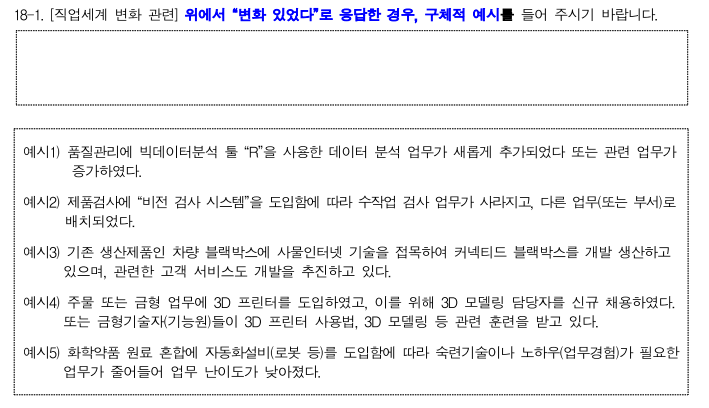

In [56]:
Image('./image/2019bq18.PNG')

In [57]:
#열을 탈락시키겠다.
know_2019 = know_2019.drop(columns = ['bq18_10'])
know_2019_test = know_2019_test.drop(columns = ['bq18_10'])

### bq20_1

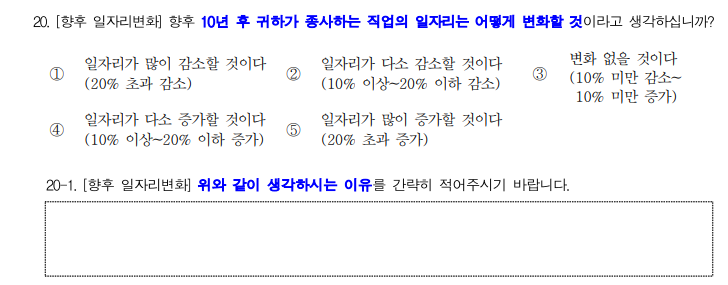

In [58]:
Image('./image/2019bq20.PNG')

In [59]:
#열을 탈락시키겠다.
know_2019 = know_2019.drop(columns = ['bq20_1'])
know_2019_test = know_2019_test.drop(columns = ['bq20_1'])

### bq21_3

In [60]:
know_2019.loc[know_2019['bq21_3'].isnull(),['bq21_1','bq21_2','bq21_3']]

,bq21_1,bq21_2,bq21_3
614,2.0,2.0,NaN
3309,3.0,4.0,NaN
7251,1.0,1.0,NaN
7758,1.0,1.0,NaN


In [61]:
# know_2019.loc[know_2019['bq21_2']==1,'bq21_3'].astype(int).describe()

In [62]:
know_2019.loc[know_2019['bq21_3']=='로봇 엔지니어',]
#로봇 엔지니어는 24에 들어가야 하고 bq24가 bq21_3으로 가면 된다.

,idx,sq1,sq2,sq3,sq4,sq5,sq6,sq7,sq8,sq9,sq10,sq11,sq12,sq13,sq14,sq15,sq16,kq1_1,kq1_2,kq2_1,kq2_2,kq3_1,kq3_2,kq4_1,kq4_2,kq5_1,kq5_2,kq6_1,kq6_2,kq7_1,kq7_2,kq8_1,kq8_2,kq9_1,kq9_2,kq10_1,kq10_2,kq11_1,kq11_2,kq12_1,...,bq14_3,bq14_4,bq14_5,bq15,bq16_1,bq16_2,bq16_3,bq16_4,bq16_5,bq17,bq18_1,bq18_2,bq18_3,bq18_4,bq18_5,bq18_6,bq18_7,bq18_8,bq18_9,bq19,bq20,bq21_1,bq21_2,bq21_3,bq22,bq23,bq24,bq25,bq26,bq27,bq27_1,bq28,bq28_1,bq28_2,bq29,bq30,bq31_1,bq31_2,bq31_3,knowcode
177,18746,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,3,4,3,4,3,3,3,3,3,3,3,3,3,3,3,4,4,5,3,4,3,...,5.0,2.0,2.0,3.0,5.0,4.0,4.0,3.0,4.0,3.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,"어떠한 분야든 자동화가 도입이 되면, 인력 감축을 불가피하며, 대신 자동화 설비 유...",2.0,1.0,로봇 엔지니어,NaN,로봇 및 자동화 시설 유지관리 분야,1,43,5.0,지능로봇학,1,1.0,NaN,1.0,60.0,6000.0,4000.0,NaN,NaN,151201


In [63]:
know_2019.loc[know_2019['bq21_3']=='로봇 엔지니어','bq24']='로봇 엔지니어'
know_2019.loc[know_2019['bq24']=='로봇 엔지니어','bq21_3']=1

In [64]:
know_2019[know_2019['bq21_3']=='PET`CT 검사, 핵의학 검사']

,idx,sq1,sq2,sq3,sq4,sq5,sq6,sq7,sq8,sq9,sq10,sq11,sq12,sq13,sq14,sq15,sq16,kq1_1,kq1_2,kq2_1,kq2_2,kq3_1,kq3_2,kq4_1,kq4_2,kq5_1,kq5_2,kq6_1,kq6_2,kq7_1,kq7_2,kq8_1,kq8_2,kq9_1,kq9_2,kq10_1,kq10_2,kq11_1,kq11_2,kq12_1,...,bq14_3,bq14_4,bq14_5,bq15,bq16_1,bq16_2,bq16_3,bq16_4,bq16_5,bq17,bq18_1,bq18_2,bq18_3,bq18_4,bq18_5,bq18_6,bq18_7,bq18_8,bq18_9,bq19,bq20,bq21_1,bq21_2,bq21_3,bq22,bq23,bq24,bq25,bq26,bq27,bq27_1,bq28,bq28_1,bq28_2,bq29,bq30,bq31_1,bq31_2,bq31_3,knowcode
3361,21931,4,3,3,3,3,3,3,4,3,3,4,4,4,3,4,4,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,4,5,1,0,1,0,1,...,2.0,2.0,2.0,4.0,3.0,3.0,4.0,3.0,3.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,2,3.0,2.0,"PET`CT 검사, 핵의학 검사","방사선 안전관리, 품질관리",NaN,1,34,3.0,방사선과,1,1.0,NaN,1.0,40.0,4100.0,2600.0,NaN,NaN,158501


In [65]:
know_2019=know_2019.drop([3361,],axis=0)

In [66]:
know_2019.loc[know_2019['bq21_3'].isnull(),'bq21_3']=know_2019.loc[know_2019['bq21_3'].isnull(),'bq21_2']

In [67]:
know_2019_test.loc[know_2019_test['bq21_3'].isnull(),['bq21_1','bq21_2','bq21_3']]

,bq21_1,bq21_2,bq21_3
3197,4,4.0,NaN
5933,2,2.0,NaN


In [68]:
for i in range(1,5):
  know_2019_test.loc[(know_2019_test['bq21_3'].isnull())&(know_2019_test['bq21_2']==i),'bq21_3']=know_2019[know_2019['bq21_2']==i]['bq21_3'].median()

In [69]:
print(sum(know_2019['bq21_3'].isnull()))
print(sum(know_2019_test['bq21_3'].isnull()))

0
0


### bq22, 23, 24 

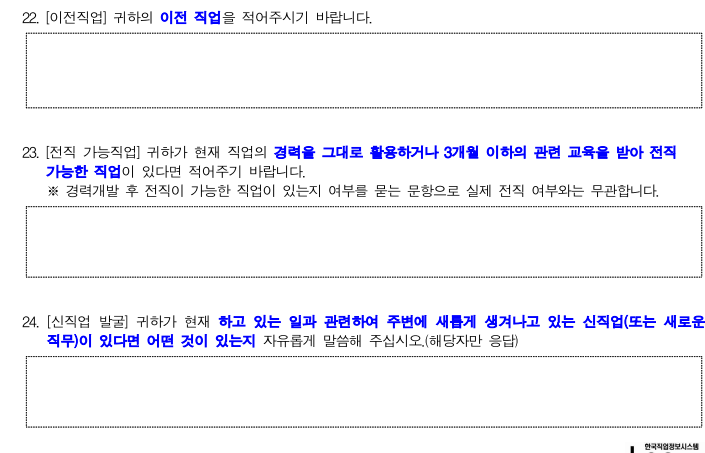

In [70]:
Image('./image/2019bq22.PNG')

In [71]:
for col in ['bq22','bq23','bq24']:
  know_2019.loc[know_2019[col].isnull(),col]='없다'
  know_2019_test.loc[know_2019_test[col].isnull(),col]='없다'

In [72]:
train_nan_columns = []
test_nan_columns = []
for index, value, tindex, tvalue in zip(know_2019.isnull().sum().index, know_2019.isnull().sum(), know_2019_test.isnull().sum().index, know_2019_test.isnull().sum()):
    if value != 0 :
        train_nan_columns.append(index)
    if tvalue != 0:
        test_nan_columns.append(tindex)

print(train_nan_columns)
print(test_nan_columns)

['bq27_1', 'bq28_1', 'bq28_2', 'bq29', 'bq30', 'bq31_1', 'bq31_2', 'bq31_3']
['bq26', 'bq27_1', 'bq28', 'bq28_1', 'bq28_2', 'bq29', 'bq30', 'bq31_1', 'bq31_2', 'bq31_3']


### bq26

26. [연령] 귀하의 나이는 만 몇 세입니까?

만 세

In [73]:
know_2019_test['bq26'].describe()

count    8553.000000
mean       41.642698
std        11.224910
min         3.000000
25%        33.000000
50%        40.000000
75%        50.000000
max        85.000000
Name: bq26, dtype: float64

In [74]:
know_2019_test.loc[know_2019_test['bq26'].isnull(),'bq26']=41.64

In [75]:
print(sum(know_2019['bq26'].isnull()))
print(sum(know_2019_test['bq26'].isnull()))

0
0


### bq27_1

27. [최종학력] 귀하의 최종학력은 무엇입니까?

① 중학교 졸업 이하 ☞ 문 28로 ② 고등학교 졸업 ☞ 문 27-1로
③ 2~3년제 대학교 졸업 ☞ 문 27-1로 ④ 대학교 졸업 ☞ 문 27-1로
⑤ 대학원 석사 졸업 ☞ 문 27-1로 ⑥ 대학원 박사 졸업 ☞ 문 27-1로

27-1. [전공] 귀하의 최종학력의 학과를 기입해 주십시오. 과

※ 최종학력이 실업계(전문계/특성화고/마이스터고) 고등학교인 경우에도 기재

In [76]:
know_2019.loc[(know_2019['bq27_1'].isnull())&(know_2019['bq27']==1),'bq27_1']='없다'
know_2019_test.loc[(know_2019_test['bq27_1'].isnull())&(know_2019_test['bq27']==1),'bq27_1']='없다'
know_2019.loc[(know_2019['bq27_1'].isnull())&(know_2019['bq27']!=1),'bq27_1']='모름'
know_2019_test.loc[(know_2019_test['bq27_1'].isnull())&(know_2019_test['bq27']!=1),'bq27_1']='모름'

In [77]:
print(sum(know_2019['bq27_1'].isnull()))
print(sum(know_2019_test['bq27_1'].isnull()))

0
0


### bq28

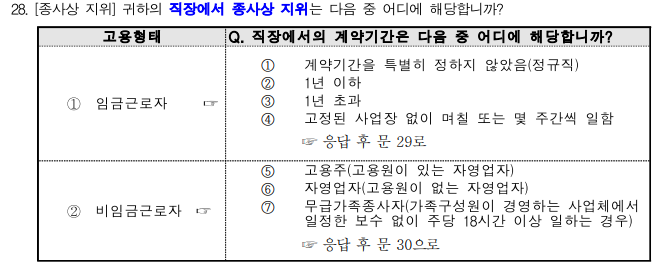

In [78]:
Image('./image/2019bq28.PNG')

결측치 모두 0으로 대체하겠다.

In [79]:
for col in ['bq28', 'bq28_1', 'bq28_2']:
  know_2019.loc[know_2019[col].isnull(),col]=0
  know_2019_test.loc[know_2019_test[col].isnull(),col]=0
  print(sum(know_2019[col].isnull()))
  print(sum(know_2019_test[col].isnull()))

0
0
0
0
0
0


### bq29

29. [계약형태] 귀하의 직장에서 고용형태는 다음 중 어디에 해당합니까?
① 정규직 ② 비정규직

In [80]:
# 결측치 0으로 대체하겠다.
know_2019.loc[know_2019['bq29'].isnull(),'bq29']=0
know_2019_test.loc[know_2019_test['bq29'].isnull(),'bq29']=0

print(sum(know_2019['bq29'].isnull()))
print(sum(know_2019_test['bq29'].isnull()))

0
0


### bq30

30. [주당 근로시간] 귀하는 보통 일주일에 실제로 몇 시간 일하십니까? 


In [81]:
know_2019.loc[know_2019['bq30'].isnull(),['bq29','bq30']]

,bq29,bq30
174,0.0,NaN
957,1.0,NaN
1316,1.0,NaN
1451,1.0,NaN
1548,0.0,NaN
2203,0.0,NaN
2543,1.0,NaN
4069,2.0,NaN
4086,1.0,NaN
5144,0.0,NaN


In [82]:
know_2019.loc[know_2019['bq29']==0,'bq30'].describe()

count    1257.000000
mean       46.500398
std        12.585006
min         7.000000
25%        40.000000
50%        48.000000
75%        54.000000
max        84.000000
Name: bq30, dtype: float64

In [83]:
know_2019.loc[(know_2019['bq29']==0)&(know_2019['bq30'].isnull()),'bq30']=46.5

In [84]:
know_2019.loc[know_2019['bq29']==1,'bq30'].describe()

count    6171.000000
mean       44.557527
std         6.607460
min        10.000000
25%        40.000000
50%        43.000000
75%        48.000000
max        84.000000
Name: bq30, dtype: float64

In [85]:
know_2019.loc[(know_2019['bq29']==1)&(know_2019['bq30'].isnull()),'bq30']=44.55

In [86]:
know_2019.loc[know_2019['bq29']==2,'bq30'].describe()

count    1097.000000
mean       40.615314
std        11.873868
min         7.000000
25%        35.000000
50%        40.000000
75%        48.000000
max        90.000000
Name: bq30, dtype: float64

In [87]:
know_2019.loc[(know_2019['bq29']==2)&(know_2019['bq30'].isnull()),'bq30']=40.61

In [88]:
know_2019['bq30'].describe()

count    8551.000000
mean       46.984713
std       126.479737
min         1.000000
25%        40.000000
50%        43.000000
75%        50.000000
max      9000.000000
Name: bq30, dtype: float64

In [89]:
know_2019_test.loc[know_2019_test['bq30'].isnull(),'bq30']=43

In [90]:
print(sum(know_2019['bq30'].isnull()))
print(sum(know_2019_test['bq30'].isnull()))

0
0


In [91]:
train_nan_columns = []
test_nan_columns = []
for index, value, tindex, tvalue in zip(know_2019.isnull().sum().index, know_2019.isnull().sum(), know_2019_test.isnull().sum().index, know_2019_test.isnull().sum()):
    if value != 0 :
        train_nan_columns.append(index)
    if tvalue != 0:
        test_nan_columns.append(tindex)

print(train_nan_columns)
print(test_nan_columns)

['bq31_1', 'bq31_2', 'bq31_3']
['bq31_1', 'bq31_2', 'bq31_3']


### bq31~

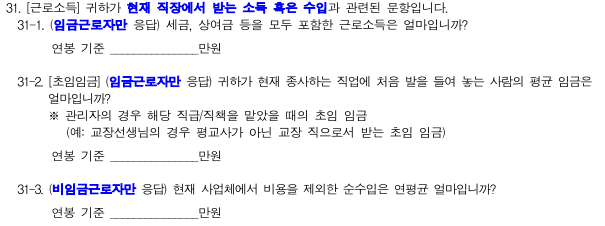

In [92]:
Image('./image/2019bq31.PNG')

In [93]:
know_2019 = know_2019.drop(columns = ['bq31_1', 'bq31_2', 'bq31_3'])
know_2019_test = know_2019_test.drop(columns = ['bq31_1', 'bq31_2', 'bq31_3'])

In [94]:
train_nan_columns = []
test_nan_columns = []
for index, value, tindex, tvalue in zip(know_2019.isnull().sum().index, know_2019.isnull().sum(), know_2019_test.isnull().sum().index, know_2019_test.isnull().sum()):
    if value != 0 :
        train_nan_columns.append(index)
    if tvalue != 0:
        test_nan_columns.append(tindex)

print(train_nan_columns)
print(test_nan_columns)

[]
[]


### object들 labelencoder로 처리

In [95]:
from sklearn.preprocessing import LabelEncoder
encoders = {}
for col in know_2019.columns:
  if col == 'ID':
    continue
  encoder = LabelEncoder()
  know_2019[col] = know_2019[col].map(str)
  know_2019[col] = encoder.fit_transform(know_2019[col])
  encoders[col] = encoder

In [96]:
# from sklearn.preprocessing import LabelEncoder
# encoders = {}
# for col in know_2019.columns:
#   if col == 'ID':
#     continue
        
#   try:
#     know_2019[col] = know_2019[col].map(int)
#   except:
#     encoder = LabelEncoder()
#     know_2019[col] = know_2019[col].map(str)
#     know_2019[col] = encoder.fit_transform(know_2019[col])
#     encoders[col] = encoder

In [97]:
for col in know_2019_test.columns:
  if col == 'ID':
    continue     
  encoder = encoders[col]
  know_2019_test[col] = know_2019_test[col].map(str)
  category_map = {category: idx for idx, category in enumerate(encoder.classes_)}
  know_2019_test[col] = know_2019_test[col].apply(lambda x: category_map[x] if x in category_map else -1) # train set에서 보지못한 카테고리변수 -1(UNK) 처리        

In [98]:
# for col in know_2019_test.columns:
#   if col == 'ID':
#     continue     
#   try:
#     know_2019_test[col] = know_2019_test[col].map(int)
#   except:
#     encoder = encoders[col]
#     know_2019_test[col] = know_2019_test[col].map(str)
#     category_map = {category: idx for idx, category in enumerate(encoder.classes_)}
#     know_2019_test[col] = know_2019_test[col].apply(lambda x: category_map[x] if x in category_map else -1) # train set에서 보지못한 카테고리변수 -1(UNK) 처리        

## 3.3 feature, label 구분

In [99]:
X_train=know_2019.drop(['idx','knowcode'],axis=1)
y_train=know_2019['knowcode']

In [100]:
X_test=know_2019_test.drop(['idx'],axis=1)

# 4. Modeling

In [101]:
!pip install catboost
from catboost import CatBoostClassifier

     |████████████████████████████████| 76.1 MB 1.3 MB/s 


In [102]:
model=CatBoostClassifier(iterations=2000,random_state=123)

model.fit(X_train,y_train)

Learning rate set to 0.049146
0:	learn: 6.2913064	total: 11.7s	remaining: 6h 30m 14s
1:	learn: 6.2509873	total: 23.5s	remaining: 6h 31m 26s
2:	learn: 6.2147301	total: 35.2s	remaining: 6h 30m 46s
3:	learn: 6.1870286	total: 46.7s	remaining: 6h 27m 58s
4:	learn: 6.1568358	total: 57.9s	remaining: 6h 25m 21s
5:	learn: 6.1082801	total: 1m 9s	remaining: 6h 23m 32s
6:	learn: 6.0800061	total: 1m 20s	remaining: 6h 22m 22s
7:	learn: 6.0458918	total: 1m 32s	remaining: 6h 22m 52s
8:	learn: 6.0130247	total: 1m 43s	remaining: 6h 23m 17s
9:	learn: 5.9888006	total: 1m 55s	remaining: 6h 21m 35s
10:	learn: 5.9553704	total: 2m 6s	remaining: 6h 21m 18s
11:	learn: 5.9122497	total: 2m 18s	remaining: 6h 21m 1s
12:	learn: 5.8705412	total: 2m 29s	remaining: 6h 20m 46s
13:	learn: 5.8428372	total: 2m 40s	remaining: 6h 20m 21s
14:	learn: 5.8161566	total: 2m 51s	remaining: 6h 19m 16s
15:	learn: 5.7925302	total: 3m 3s	remaining: 6h 18m 48s
16:	learn: 5.7640962	total: 3m 14s	remaining: 6h 18m 6s
17:	learn: 5.7362634	

In [103]:
pred=model.predict(X_test)
pred

array([[253],
       [508],
       [ 69],
       ...,
       [383],
       [289],
       [289]])

In [104]:
pd.DataFrame(pred).to_csv('2019.csv',index=False)

In [105]:
# sub=pd.read_csv('2018.csv')
# sub

In [106]:
# pd.DataFrame(np.concatenate([sub,pd.DataFrame(pred)])).to_csv('2019.csv',index=False)